# Assignment 1

This assignment has 3 parts. The evaluation of this assignment will be performed as an overall review of the hand-in, by your TA. To pass the assignment, the TA must be convinced that you have understood all portions of the curriculum which are covered by the assignment.

We expect you to hand in individual assignments, but you are allowed to discuss the questions with each other. This means that you need to write your own answers, and your own, personal code, for all questions.

Besides getting the correct answers, solutions will also be judged based on clarity, efficiency and brevity. 

The assignment is due on Thursday 5th of October, at 11 pm. We expect each student to upload a pdf of their answers (written in whatever language your TA can read). When preparing the document, please follow these guidelines:

Format the code as a jupyter notebook, and export this to pdf. If you work in google colab, the easiest solution seems to be to download the notebook after running it, and exporting to pdf on your own computer.
Remember to include comments in your code.
Name the file as 'firstname_lastname_auID.pdf' (eg. 'kaare_mikkelsen_au123456.pdf')
To make our expectations clear, see this dummy example of an assignment: <a href="https://brightspace.au.dk/content/enforced/108586-LR25340/dummyAssignment.pdf?_&d2lSessionVal=qnWWoiztGzYsK7oElSxZuvXu7"> dummyAssignment.pdf</a>

When preparing your notebook, you may assume that the data files accompanying this assignment are placed in the same folder as the script.

### Part 1:

In your own words, answer the following questions:

a: In your opinion, what were the most important turning points in the history of deep learning?

b: Explain the ADAM optimizer.

c: Assume data input is a single 30x40 pixel image. First layer is a convolutional layer with 5 filters, with kernel size 3x2, step size (1,1) and padding='valid'. What are the output dimensions?

d: Assuming ReLU activations and offsets, and that the last layer is softmax, how many parameters does this network have: 

<img src="data/image.png" width="400"/>

e: For a given minibatch, the targets are [1,4, 5, 8] and the network output is [0.1,4.4,0.2,10]. If the loss function is "torch.nn.HuberLoss(reduction='mean', delta=1.0)", what is the loss for this minibatch?

**Answers:**

a) The most important turning points in the history of deep learning are probably a collection of many things. But if I have to pick some of the most important things in my opinion, I would say that backpropagation is the first one, allowing us the train deep networks in the first place. And ReLU allowed us to train deep networks without vanishing gradients, which we would get if we use sigmoid or tanh. Then we have some models that demonstrated the geatness of deep learning, such as, AlexNet (image recognition) which uses convolutional neural networks. Generative Advessarial Networks (GANs) which can generate images. AlphaGo (game playing) which can beat the best human players in the world. Transformers, which is used for natural language processing, is also a very important model. But most of all, a huge contribution to deep learning is the availability of data and the gpu computational power.

<div style="padding: 20px;"></div>

b) The ADAM (Adaptive Moment Estimation) optimizer is an extension of the stochastic gradient descent (SGD) method, and it combines ideas from two other optimization algorithms: AdaGrad and RMSProp.

Here's a step-by-step breakdown of how ADAM works:

1. **Initialization**:
   - Define two variables, $m$ and $v$, both initialized as zero vectors. $m$ will keep track of the first moment (mean) of the gradient, and $v$ will keep track of the second moment (uncentered variance).

2. **Compute Gradient**:
   - Calculate the gradient $g$ of the loss with respect to the parameters.
      - $g = \nabla_\theta J(\theta)$

3. **Update Biased First and Second Moment**:
   - $m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g$
   - $v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g^2$
   
   Here, $\beta_1$ and $\beta_2$ are hyperparameters that control the exponential decay rates. Typically, $\beta_1$ is set close to 1 (e.g., 0.9) and $\beta_2$ is set even closer to 1 (e.g., 0.999).

4. **Bias Correction**:
   - Since $m$ and $v$ are initialized as zero vectors, they will be biased toward zero as both $\beta_1$ and $\beta_2$ $\approx 1$.
   - To correct for the initialization bias (since $m$ and $v$ were initialized at zero), ADAM includes a bias correction step:
     - $\hat{m_t} = \frac{m_t}{1 - \beta_1^t}$
     - $\hat{v_t} = \frac{v_t}{1 - \beta_2^t}$

5. **Update Parameters**:
   - $\theta_{t+1} = \theta_t - \frac{\alpha \cdot \hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon}$
   
   Here, $\theta$ represents the model's parameters weights and biases ($w, b$), $\alpha$ is the learning rate, and $\epsilon$ is a small constant (e.g., $10^{-7}$) added for numerical stability to prevent division by zero. And $L$ is the loss function.

Some of the reasons for ADAM's popularity include:
- It requires minimal tuning of the learning rate $\alpha$ compared to other optimizers.
- It uses moving averages of the parameters (momentum) which can help navigate the optimization landscape (when the gradient would othrwise be close to zero), thus speeding up the convergence.
- It scales the learning rate for each parameter individually, which can be beneficial when dealing with sparse data or large models.

<div style="padding: 20px;"></div>

c) Given that we have:

- Input size: 30×40
- Kernel size: 3×2
- Stride: 1,1
- Padding: 'valid' (which means no padding)

Just quickly some explanations of the parameters:

- *Kernels*: The kernel (also called filter) is a smaller-sized window that slides over the input data (like an image) to produce a feature map or convolved output. The values of the filter matrix are learnable parameters that get updated during training.

- *Convolution Operation*: As the filter slides around the input image, it multiplies its values by the original pixel values in that location. These products are summed up, and the result forms a single pixel in the output feature map. This process is repeated across the entire image.

- *Stride*: A stride of 1 moves the filter one pixel at a time. A larger stride results in a smaller feature map.

- *Padding*: Sometimes, it's useful to pad the input volume with zeros around the border. Padding can help control the size of the output volumes, ensuring they're more manageable and retaining more information at the borders.

Given these processes, we have the formula for calculating the output size of a convolutional layer as: 

\begin{align*}
   \text{Output} = \left((W - K + 2P)//S \right) + 1,
\end{align*}

where W is the input volume, K is the size of the kernel, P is the padding and S is the stride. Here '//' is the floor division, giving the 'lower' integer value of the division.

The formula essentially says that, if we have a 10x10 input volume, a 3x3 kernel, we would the apply the kernel to the top left corner, we would then 'remove' 3x3 of the pixels from the original picture and just return 1 convoluted pixel. Thus, we have that for respectively the columns and rows, We can say that the output size will be the input minus the kernel and plus 1, since it returns 1 pixel. The reason that we are adding 2 times the padding, is because, when applying a padding, we get the padding on both sides of the picture, thus essentially increasing the input picture by 2 times the size of the padding. And finally, when applying the stride, we are essentially 'skipping' some of the pixels, thus reducing the number of pixels we get out again from the kernel (And we need the output to be a whole number, if the kernel is trying to take 3 column pixels, but there is only 1 left, we would then skip that last column pixel. Thus the floor division). Thus we get the formula above.

Thus we get that the output size is:

\begin{align*}
   \text{Output rows} &= \left((30 - 3 + 2*0)//1 \right) + 1 = 28 \\
   \text{Output columns} &= \left((40 - 2 + 2*0)//1 \right) + 1 = 39 
\end{align*}

So output size is [5, 28, 39], since we applied 5 filters in the first layer.

<div style="padding: 20px;"></div>

d) Given the network described above. We know that the relu takes an aggregation of the input values (weights and biases) and outputs 0 is the aggregation is negative, and if the aggregation is positive, it outputs the aggregation. And the softmax also takes an aggregation of the inputs, but returns a value between 0 and 1.

So given the above, to calculate the number of parameters, we need to calculate how many weights and biases we have in the network. So starting from the second layer (first hidden layer), since 1 neuron of this layer takes a weighted aggregation of all the input neurons plus a bias, we can say that the number of parameters for eac layer, starting from the second is, number of neurons in the previuous layer, times the number of neurons in the current layer, plus the number of neurons in the current layer. More formally:

$w = l_{t-1} * l_{t}$, $b = l_{t}$, where $l_{t-1}$ is the number of neurons in the previous layer, and $l_{t}$ is the number of neurons in the current layer. Thus giving us the total number of parameters in that layer as $w + b$.

Thus we get that our network above has (since it is fully connected):

 - Weights: $(5 * 5) + (5 * 5) + (5 * 5) + (5 * 3) = 90$
 - Biases: $5 + 5 + 5 + 3 = 18$

Giving us the total number of parameters as $90 + 18 = 108$.

<div style="padding: 20px;"></div>

e) From <a href="https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html"> pytorch's website</a>, we have the following describtion of the function:

For a batch of size $N$, the unreduced loss can be described as:
$$
\ell(x, y)=L=\left\{l_1, \ldots, l_N\right\}^T
$$
with
$$
l_n= \begin{cases}0.5\left(x_n-y_n\right)^2, & \text { if }\left|x_n-y_n\right|<\text { delta } \\ \text { delta } *\left(\left|x_n-y_n\right|-0.5 * \text { delta }\right), & \text { otherwise }\end{cases}
$$
If reduction is not none, then:
$$
\ell(x, y)= \begin{cases}\operatorname{mean}(L), & \text { if reduction }=\text { 'mean'; } \\ \operatorname{sum}(L), & \text { if reduction = 'sum' }\end{cases}
$$

<div style="padding: 5px;"></div>

Thus given the thier describtion of their function, we have that $\ell(x, y) = \ell([1,4, 5, 8], [0.1,4.4,0.2,10]) = L$, reduction is 'mean' and delta is 1.0. So we get that:

\begin{align*}
   l_1 &= | 1 - 0.1 | = 0.9 < 1 \\
   l_2 &= | 4 - 4.4 | = 0.4 < 1 \\
   l_3 &= | 5 - 0.2 | = 4.8 \not< 1 \\
   l_4 &= | 8 - 10 | = 2 \not< 1 \\
\end{align*}

Thus givimg us:

\begin{align*}
   l_1 &= 0.5 * (1 - 0.1)^2 = 0.405 \\
   l_2 &= 0.5 * (4 - 4.4)^2 = 0.08 \\
   l_3 &= 1 * (|5 - 0.2| - 0.5 * 1) = 4.3 \\
   l_4 &= 1 * (|8 - 10| - 0.5 * 1) = 1.5 \\
\end{align*}

And finally, we get the loss, as he mean of the above, which is:

\begin{align*}
   L &= \frac{0.405 + 0.08 + 4.3 + 1.5}{4} = 1.57125
\end{align*}

And below, we show that the above is correct, by using pytorch's implementation of the Huber loss function.


In [1]:
import torch
import torch.nn as nn

# Given targets and network output
targets = torch.tensor([1, 4, 5, 8], dtype=torch.float32)
network_output = torch.tensor([0.1, 4.4, 0.2, 10], dtype=torch.float32)

# Compute HuberLoss
huber_loss = nn.HuberLoss(reduction='mean', delta=1.0)
loss_value = huber_loss(network_output, targets)
loss_value.item()

1.571250081062317

### Part 2: Writing a PyTorch dataset 
The Insects.zip-file contains images of three species of bees. The Insects.csv -file has three columns of which you should focus on the one named "species" and the one named "filename". The "species" column tells the target label of the images listed in the "filename" column.

Your task is to write a PyTorch dataset, which provides image samples together with their target labels.

I.e.,

<image data from 1_003311_1_2020_05_09-14-21-01-479.jpg>,  Andrena fulva <br>
<image data from 1_206320_1_2020_03_04-11-17-03-984.jpg>,  Panurgus banksianus <br>
<image data from 2_208265_1_2020_03_07-10-34-31-425.jpg>,  Lasioglossum punctatissimum <br>

...

insects.csv (in data folder)

Insects.zip (in data folder)

You can  read more about datasets in PyTorch here:

* <a href="https://pytorch.org/tutorials/beginner/basics/data_tutorial.html"> Data tutorial</a> <br>
* <a href="https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d"> Creating a custom Dataset and Dataloader in Pytorch</a> <br>

You can use the following python-script to test your dataset: <br>
dataset_tester.py (in data folder)

In [2]:
# Initialize the packages to be loaded
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.io import read_image
from torch.utils.data import Subset, Dataset, DataLoader, TensorDataset

In [3]:
class InsectsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.insects_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.insects_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.insects_frame.iloc[idx, 2])  # Assuming filename is in the second col
        image = read_image(img_name)  # Using torchvision.io to read the image
        species = self.insects_frame.iloc[idx, 1]  # Assuming species is in the first column

        # Transform picture to correct size
        if self.transform:
            image = self.transform(image)

        return [image, species]


# Make a conditional transform to tensor (since we ue torchvision.io to read the image, it will already be a tensor)
class ConditionalToTensor(transforms.ToTensor):
    def __call__(self, pic):
        if isinstance(pic, torch.Tensor):
            return pic
        return super().__call__(pic)

In [4]:
# Define a basic transform to convert the images to PyTorch tensors
transform = transforms.Compose([
    transforms.Resize((128, 128)), # Resize images for demonstration purposes
    ConditionalToTensor() # Checks if the input is a tensor before converting it
])

csv_file='./data/Insects.csv'
Image_folder='./data/Insects/'

# Create an instance of the dataset
insects_dataset = InsectsDataset(csv_file=csv_file, root_dir=Image_folder, transform=transform)

In [5]:
insects_dataset.__getitem__(0)

c:\Users\bjark\anaconda3\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[tensor([[[112, 109, 105,  ..., 117, 108, 109],
          [111, 108, 107,  ..., 119, 109, 109],
          [111, 108, 109,  ..., 121, 107, 108],
          ...,
          [115, 106, 106,  ..., 110, 108, 103],
          [116, 107, 106,  ..., 112, 108, 105],
          [117, 110, 107,  ..., 110, 106, 105]],
 
         [[137, 138, 136,  ..., 147, 135, 136],
          [140, 139, 136,  ..., 146, 137, 136],
          [139, 136, 137,  ..., 142, 138, 139],
          ...,
          [145, 136, 136,  ..., 140, 137, 131],
          [146, 138, 135,  ..., 142, 136, 133],
          [144, 139, 137,  ..., 141, 137, 134]],
 
         [[201, 201, 199,  ..., 202, 202, 205],
          [201, 199, 200,  ..., 209, 202, 202],
          [202, 200, 200,  ..., 206, 202, 201],
          ...,
          [194, 195, 196,  ..., 196, 196, 194],
          [195, 197, 195,  ..., 200, 198, 197],
          [199, 199, 201,  ..., 198, 194, 198]]], dtype=torch.uint8),
 'Andrena fulva']

Here we see, that we get the output that we wished for, and thus our dataset works as intended. Now lets test it with the given dataset_tester.py script. However, since both windows and jupyter notebook (IPython) have problems with multiprocessing, we need to adjust the code a little. As such, we need to including the dataset instantiation and the data loading, inside a ".py" script. This way, when the script is executed, the required processeses are initialized correctly, avoiding potential deadlocks or issues related to process spawning. And when running on a windows computer, we need to run the script inside a `if __name__ == '__main__':` block, to avoid the script being executed multiple times. So therefor I have created a new script called Custom_DataLoader.py, which I have put inside the folder "functions". This ".py" file contains the above class which initiates our data set, and then followed by a modificated verison of the code from the dataset_tester.py script, wrapped in a function called custom_dataLoader. Below, I will provide the modified code in text form, and then I will show the output from running the script. Where I also added the option of running it on the GPU, if it is available.

</br>

```python
def custom_dataLoader():
    # Detect if a GPU is available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # Define a basic transform to convert the images to PyTorch tensors
    transform = transforms.Compose([
        transforms.Resize((128, 128)), # Resize images for demonstration purposes
        ConditionalToTensor() # Checks if the input is a tensor before converting it
    ])

    csv_file='./data/Insects.csv'
    Image_folder='./data/Insects/'

    # Create an instance of the dataset
    insects_dataset = InsectsDataset(csv_file=csv_file, root_dir=Image_folder, transform=transform)

    batches = 4

    # Set up the dataset.
    trainloader = torch.utils.data.DataLoader(insects_dataset, 
                                            batch_size=batches, 
                                            shuffle=True, 
                                            num_workers=2)

    # get some images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Move data (tensors) to the GPU
    images = images.to(device)

    # How many batches to show
    num_examples = 5

    # Scale the figure size based on the number of batches and examples
    scale_of_figure = 3

    # Adjust the number of columns and rows to display, together with the figsize,
    # given how large the batches are and the number of examples we want to show
    fig, axs = plt.subplots(num_examples, batches, 
                            figsize=(scale_of_figure * batches, scale_of_figure * num_examples)) 

    img_count = 0
    for i in range(num_examples): # Run through 5 batches
        images, labels = dataiter.next()
        images = images.to(device) # Move the tensors to the GPU
        for image, label in zip(images, labels): # Run through all samples in a batch
            row = img_count // batches
            col = img_count % batches
            axs[row, col].imshow(np.transpose(image.cpu().numpy(), (1, 2, 0)))
            axs[row, col].set_title(label)
            axs[row, col].axis('off')
            img_count += 1

    # If there are unused subplot axes at the end, turn them off
    for idx in range(img_count, num_examples * batches):
        row = idx // batches
        col = idx % batches
        axs[row, col].axis('off')

    plt.tight_layout()
    plt.show()
```

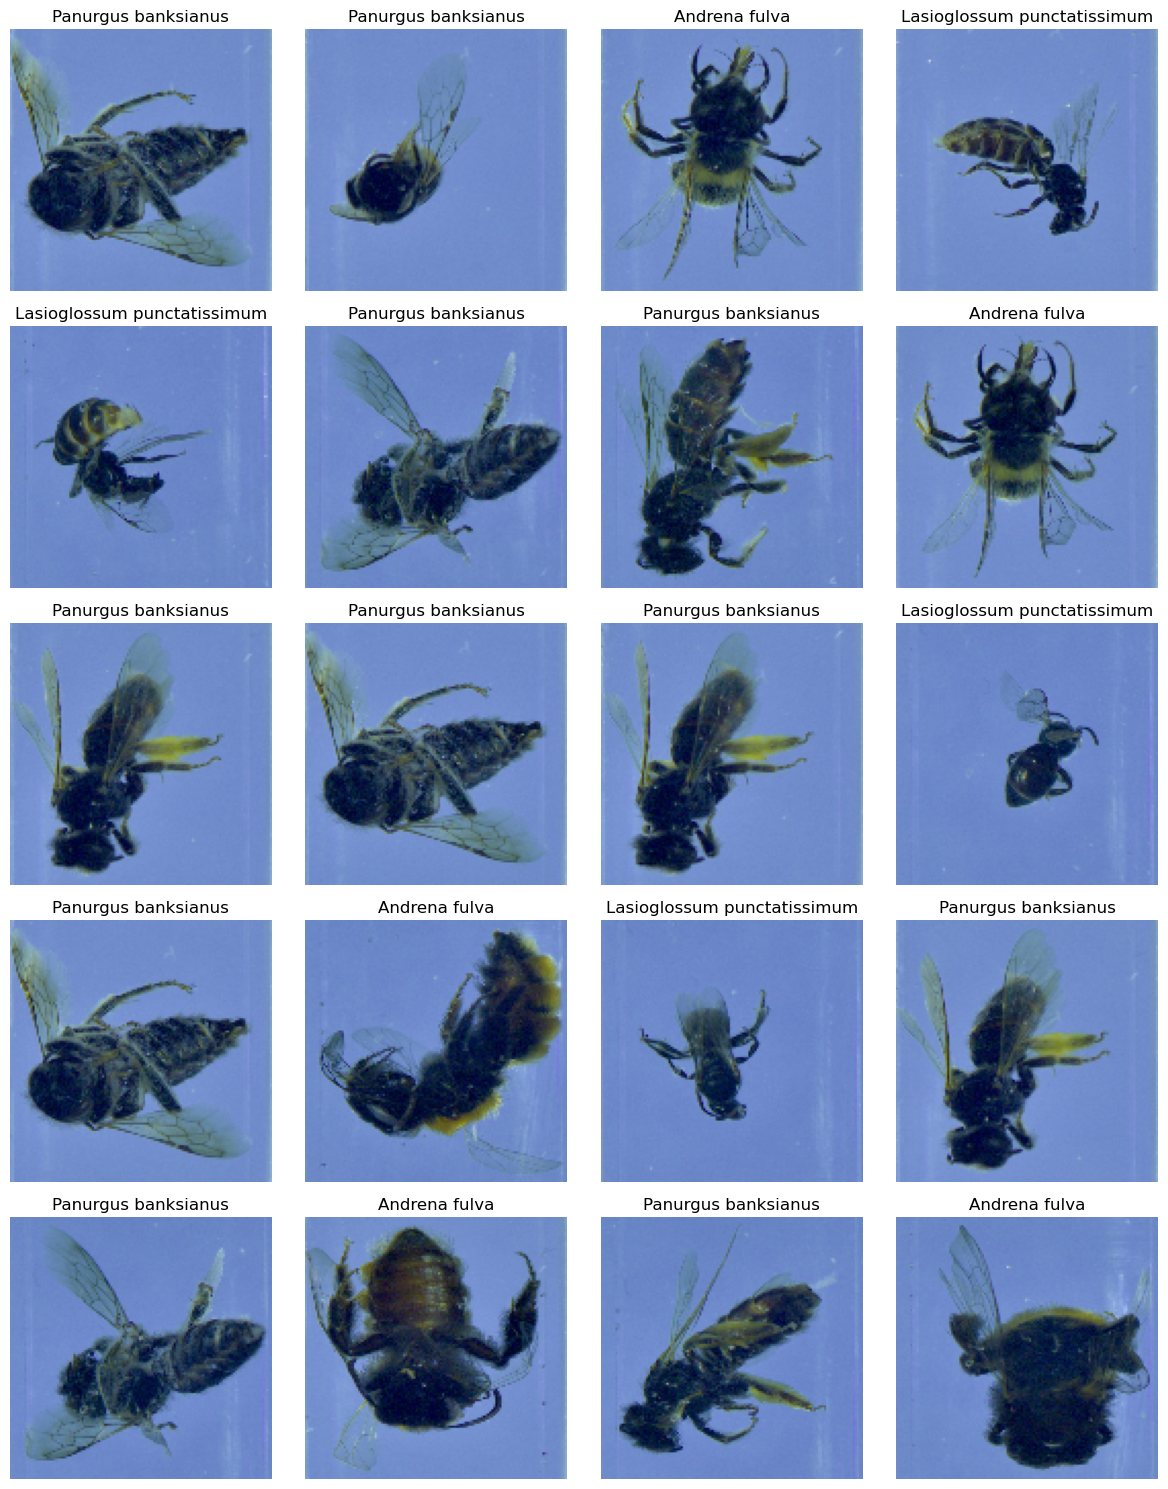

In [8]:
# For multiprocessing to work, the code needs to be in a separate .py file and we need to run it with 
# the __name__ == '__main__' check for Windows

# Load the multiprocessing library DataLoader, and make it reloadable for devolopment purposes
import functions.Custom_DataLoader
from importlib import reload
reload(functions.Custom_DataLoader)
from functions.Custom_DataLoader import custom_dataLoader

if __name__ == '__main__':
    # Call the dataloader function
    custom_dataLoader()

### Part 3: 

We supply two datasets, with points drawn from a 2D feature space, and a label assigned to each data point. The data has already been assigned to train and test sets. Each file is a table, where first column is the label, and the 2nd and 3rd columns are the features. This exercise does not require a gpu.  
<a href="https://brightspace.au.dk/content/enforced/71450-LR13847/trainData.txt?_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=mlX0kjzvB1L2eHxxCsdh6ks5j"> trainData</a>, <a href="https://brightspace.au.dk/content/enforced/71450-LR13847/testData.txt?_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=mlX0kjzvB1L2eHxxCsdh6ks5j"> testData</a> <br>

a: describe & visualize the data

b: design a neural network using pytorch to correctly assign labels 

* Describe your network

* Describe your training strategy

* Describe your results and discuss the observed performance

* Visualize network performance similar to:
---------------------------------------------------------

model= #trained pytorch network

import numpy as np  
import matplotlib.pyplot as plt  
model.cpu()  
x,y=np.meshgrid(np.linspace(-1,1,30),np.linspace(-1,1,30))  
xy=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)  
z=model(torch.tensor(xy).float()).detach().numpy()  
z=np.argmax(z,1).reshape(30,30)  
plt.contourf(x,y,z)  
plt.scatter(trainX[:,0],trainX[:,1],c=trainLabels)  

---------------------------------------------------------

**Answers:** </br>  


a) We will start by importing the data, and then visualize it.

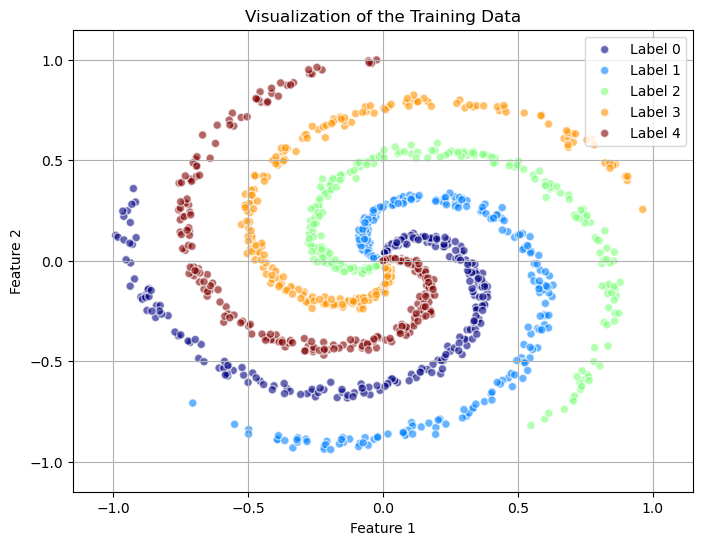

In [9]:
# Load the datasets
train_data = pd.read_csv('./data/trainData.txt', header=None, delim_whitespace=True, 
                         names=['label', 'feature1', 'feature2'])
test_data = pd.read_csv('./data/testData.txt', header=None, delim_whitespace=True, 
                        names=['label', 'feature1', 'feature2'])

# Define a normalization based on label values (for plotting purposes)
norm = plt.Normalize(train_data['label'].min(), train_data['label'].max())

# Visualize the data
plt.figure(figsize=(8, 6))
for label in sorted(train_data['label'].unique()):
    subset = train_data[train_data['label'] == label]
    plt.scatter(subset['feature1'], subset['feature2'], norm=norm, c=subset['label'], 
                cmap="jet", label=f'Label {int(label)}', alpha=0.6, edgecolors='w')
    
plt.title('Visualization of the Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

We can see that, we have some data in a 2D space, where we have 5 clusters and where all the clusters go in a spiral that meet in a center point (0, 0). While going out from the center, then each cluster is spread more apart from each other, however the points within a cluster are still relatively close to each other, but we observe fewer observations in the tails of the clusters.

b)  

**1. Describe your network:** We have designed a simple feedforward neural network. Given our 2D input space, the input layer comprises 2 nodes. The architecture includes two hidden layers, both activated with a ReLU function. The first hidden layer houses 64 neurons, followed by a second layer with 32 neurons. This design choice allows our network to be both wide and non-linear, granting our model the flexibility to capture intricate patterns from the input. Our output layer consists of nodes equal to the number of unique labels in the dataset (which is 5). And we will use a linear connection to all the output nodes, to provide class probabilities (just not between 0 and 1) (Such that it sort of mathces what we have worked with above in part 1). The reason why we don't use a softmax activation function in the output layer, is because we will use the cross-entropy loss function, which expects the output of the network to be logits (unnormalized log probabilities). And because the cross-entropy loss function applies the softmax function for us, we therefor would only skew the softmax results, and we therefor don't need to apply it in the output layer.

**2. Describe your training strategy:** We'll use the Adam optimizer, as we described above. For the loss function, we'll use the cross-entropy loss, which is suitable for multi-class classification tasks. The network will be trained using mini-batch gradient descent in a cross-validation framework. This approach ensures that our model, during its various training cycles, gets validated against different subsets of the training data. However, it still gets trained on the entirety of the training set. The true test of its performance will be on the completely 'unseen' test set. We will also decay the learning rate every so many epochs, to be able to make some larger jumps in the beginning, and then gradually take smaller steps, to find a global minima in the gradient decent. Lastly, we will use early stopping, to stop the training if the validation loss does not improve for a given number of epochs. This is to prevent overfitting and speed up computational time.

Let's start by preparing the data and defining the neural network model.

In [10]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

# Extracting features and labels from the dataframe
trainX = train_data[["feature1", "feature2"]].values
trainLabels = train_data["label"].values.astype(int)
testX = test_data[["feature1", "feature2"]].values
testLabels = test_data["label"].values.astype(int)

# Convert them to PyTorch tensors
trainX_tensor = torch.tensor(trainX, dtype=torch.float32)
trainLabels_tensor = torch.tensor(trainLabels, dtype=torch.int64)
testX_tensor = torch.tensor(testX, dtype=torch.float32)
testLabels_tensor = torch.tensor(testLabels, dtype=torch.int64)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(SimpleNN, self).__init__()

        # Hidden Layer 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # Hidden Layer 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # Output Layer
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define network dimensions
input_dim = trainX.shape[1]
hidden_dim1 = 64
hidden_dim2 = 32
output_dim = len(np.unique(trainLabels))

# Instantiate the model
model = SimpleNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

model


SimpleNN(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=5, bias=True)
)

The designed neural network consists of:

- An input layer with 2 neurons (that takes the 2D feature data).
- A hidden layer with 64 neurons and a ReLU activation function.
- A hidden layer with 32 neurons and a ReLU activation function.
- An output layer with 5 neurons (corresponding to the five unique labels) that produces logits (probabilities) for each class.  

**Training Strategy:**
Now, we will train this model using the following strategy:

- Loss Function: Cross-Entropy Loss (because it's a classification problem with multiple classes).
- Optimizer: Adam optimizer.
- Epochs: We will train for a predefined number of epochs, checking the accuracy on the test set to avoid overfitting.
- Batch Size: 50.
- Save the best model with the lowest test loss.

**Training Strategy:**
Now, we will train this model using the following strategy:

- *Cross-Validation*: We use k-fold cross-validation with k = 5. In each fold, the dataset is split into a training subset and a validation subset. This helps in evaluating the model's performance on different splits of the dataset and ensures that our results are more generalizable.

- *Loss Function*: Cross-Entropy Loss, suitable for multi-class classification problems.

- *Optimizer*: Adam optimizer, which adapts the learning rate during training and is known for its efficiency.

- *Learning Rate*: Initially set to 0.01 and is decayed by a factor of 0.8 every 50 epochs to fine-tune the convergence.

- *Epochs*: Up to 500 epochs, but with an early stopping mechanism based on validation loss to prevent overfitting.

- *Early Stopping*: If the validation loss doesn't improve for 30 consecutive epochs, the training is terminated early for that fold. This helps in preventing overfitting and also speeds up the training process.

- *Batch Size*: Mini-batch gradient descent with a batch size of 50 is used.

- *Model Weights*: For each fold, we save the model's weights that give the best validation loss. At the end of the k-fold cross-validation, we select the model weights from the fold with the lowest validation loss as our best model.

In [11]:
def k_fold_split(dataset, k_folds=5):
    
    # Shuffle dataset indices
    indices = torch.randperm(len(dataset))
    
    # Split indices into k chunks/folds
    return [indices[i::k_folds] for i in range(k_folds)]

In [12]:
# Set seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Lists to keep track of training and validation losses
train_losses = []
test_losses = []

# Parameters
batch_size = 50
epochs = 500
k_folds = 5
early_stop_epochs = 30  # Number of epochs to wait before stopping if no improvement in validation loss

# Convert the training data into a TensorDataset and use DataLoader for minibatch handling
train_dataset = TensorDataset(trainX_tensor, trainLabels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Lists to keep track of training and validation losses across folds
all_train_losses = []
all_val_losses = []

# Initialize early stopping counter and best validation loss across folds
best_val_loss = float('inf')
best_model_weights = None
fold_val_losses = []

# Get the k-fold split indices
k_fold_indices = k_fold_split(train_dataset, k_folds)

# A list to store the best model weights for each fold
best_weights_per_fold = []

for fold, val_indices in enumerate(k_fold_indices):
    print(f"FOLD {fold + 1}")
    
    # Create training indices by excluding the validation indices
    train_indices = [i for i in range(len(train_dataset)) if i not in val_indices]
    
    # Create training and validation subsets
    train_subset = Subset(train_dataset, train_indices)
    val_subset = Subset(train_dataset, val_indices)
    
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    
    # Reset the learning rate for each fold
    lr = 0.01

    # Reset the model and optimizer for each fold
    model = SimpleNN(input_dim, hidden_dim1, hidden_dim2, output_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Lists to keep track of training and validation losses
    train_losses = []
    val_losses = []

    # Initialize early stopping counter and best validation loss for this fold
    early_stop_counter = 0
    fold_best_val_loss = float('inf')
    
    # Train the model
    for epoch in range(epochs):
        # Training loop for one epoch (one full pass over the training set minus the validation indices)
        for batch_X, batch_labels in train_loader:

            # Compute the model's predictions on the test/validation data.
            # Here, the model processes the train data through our model defined above and returns 
            # its predictions.
            outputs = model(batch_X)

            # Compute the loss between the model's predictions and the actual labels in the 
            # test/validation data.
            # This gives us an idea of how well the model is predicting on trained data.
            loss = criterion(outputs, batch_labels)
            
            # Backward pass and optimization

            # Zero out the gradients for the optimizer. This prevents accumulation of gradients from 
            # previous iterations.
            # In PyTorch, gradients accumulate by default (useful for things like RNNs), so they need 
            # to be cleared out 
            # before each new gradient computation.
            optimizer.zero_grad()

            # Compute the gradients for each parameter based on the current loss. 
            # This function backpropagates the error through the network by computing the gradient of 
            # the loss with 
            # respect to each (learnable) parameter.
            loss.backward()

            # Update the model's parameters based on the computed gradients. Our model was defined 
            # in the previous cell,
            # This step adjusts each parameter (like weights and biases) in the direction that reduces 
            # the loss.
            # Here we namely use the ADAM optimizer.
            optimizer.step()
        
        # Training loss for the epoch
        outputs = model(trainX_tensor[train_indices])
        train_loss = criterion(outputs, trainLabels_tensor[train_indices])
        train_losses.append(train_loss.item())
        
        # Validation loss

        # `torch.no_grad()` is a context manager that disables gradient computation during inference.
        # Disabling gradient computation is beneficial for evaluation, saves memory, and speeds up the 
        # computation.
        # We don't need gradients during validation or testing since we're not updating the model parameters.
        with torch.no_grad():

            # Here, the model processes the test data and returns its predictions.
            outputs = model(trainX_tensor[val_indices])

            # This gives us an idea of how well the model is performing on unseen data.
            val_loss = criterion(outputs, trainLabels_tensor[val_indices])

            # Record the validation loss
            val_losses.append(val_loss.item())

        # Check early stopping (to prevent overfitting and speed up training)
        if val_loss < fold_best_val_loss:
            fold_best_val_loss = val_loss
            early_stop_counter = 0 # Reset early stopping counter

            # Save the best weights for this fold
            current_best_weights = model.state_dict().copy()
        else:
            early_stop_counter += 1 # No improvement, increase early stopping counter
            if early_stop_counter >= early_stop_epochs:
                print(f"Early stopping on epoch {epoch+1}")
                break
        
        # Print loss every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Decay the learning rate every 50 epochs
            lr = lr * 0.8
            print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss.item():.4f},',
                  f'Val Loss: {val_loss.item():.4f}, Learning Rate: {lr:.4f}')
    
    # Save the best weights for this fold
    best_weights_per_fold.append(current_best_weights)

    # Save the training and validation losses for this fold
    fold_val_losses.append(fold_best_val_loss)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Choose the best model based on average validation loss across folds
best_fold = np.argmin(fold_val_losses)
best_model_weights = best_weights_per_fold[best_fold]

FOLD 1
Epoch [50/500], Train Loss: 0.0400, Val Loss: 0.0364, Learning Rate: 0.0080
Epoch [100/500], Train Loss: 0.0438, Val Loss: 0.0394, Learning Rate: 0.0064
Early stopping on epoch 149
FOLD 2
Epoch [50/500], Train Loss: 0.0521, Val Loss: 0.0790, Learning Rate: 0.0080
Epoch [100/500], Train Loss: 0.0214, Val Loss: 0.0740, Learning Rate: 0.0064
Early stopping on epoch 105
FOLD 3
Epoch [50/500], Train Loss: 0.0560, Val Loss: 0.0705, Learning Rate: 0.0080
Epoch [100/500], Train Loss: 0.0181, Val Loss: 0.0477, Learning Rate: 0.0064
Early stopping on epoch 135
FOLD 4
Epoch [50/500], Train Loss: 0.0354, Val Loss: 0.0732, Learning Rate: 0.0080
Epoch [100/500], Train Loss: 0.0230, Val Loss: 0.0486, Learning Rate: 0.0064
Early stopping on epoch 118
FOLD 5
Epoch [50/500], Train Loss: 0.0334, Val Loss: 0.0499, Learning Rate: 0.0080
Epoch [100/500], Train Loss: 0.0192, Val Loss: 0.0330, Learning Rate: 0.0064
Epoch [150/500], Train Loss: 0.0142, Val Loss: 0.0340, Learning Rate: 0.0051
Epoch [200/

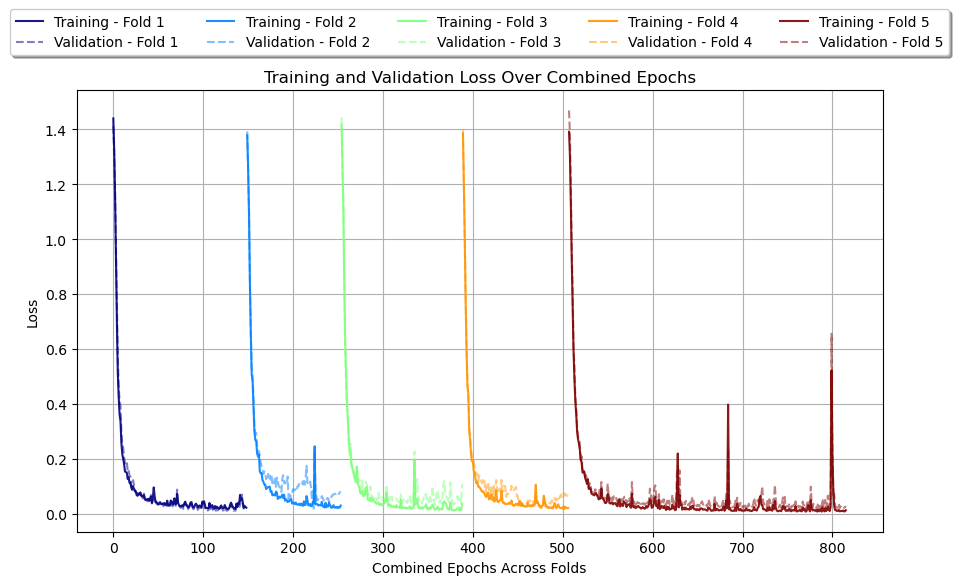

In [13]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

# This variable keeps track of the last epoch of the previous fold
last_epoch = 0
colors = plt.cm.jet(np.linspace(0, 1, k_folds))  # Generate distinct colors for each fold

for fold, (train_loss, val_loss) in enumerate(zip(all_train_losses, all_val_losses)):
    epochs = range(last_epoch, last_epoch + len(train_loss))
    plt.plot(epochs, train_loss, label=f"Training - Fold {fold + 1}", linestyle='-', color=colors[fold], alpha=0.9)
    plt.plot(epochs, val_loss, label=f"Validation - Fold {fold + 1}", linestyle='--', color=colors[fold], alpha=0.5)
    last_epoch = epochs[-1] + 1

plt.xlabel("Combined Epochs Across Folds")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Combined Epochs")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=k_folds, fancybox=True, shadow=True)
plt.grid(True)
plt.tight_layout()
plt.show()


**3. Describe your results and discuss the observed performance:** 

- Both the training and validation losses have decreased over the epochs, showing that our model is learning.
- The model has not overfitted too much, as the validation loss is pretty much following the same trend as the training loss.
- The final training and validation losses seem reasonably low, suggesting that our model should have decent performance.

In [14]:
last_model = model.state_dict().copy() # Save the last model

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation during inference
    outputs = model(testX_tensor) # Forward pass
    _, predicted = torch.max(outputs, 1)  # Get the index (class label) with the maximum score in the output
    correct = (predicted == testLabels_tensor).sum().item()
    accuracy = 100 * correct / len(testLabels_tensor)

print(f"Accuracy on test data, with last model: {accuracy:.2f}%")

model.load_state_dict(best_model_weights) # Load the model with the best weights according to validation loss

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation during inference
    outputs = model(testX_tensor) # Forward pass
    _, predicted = torch.max(outputs, 1)  # Get the index (class label) with the maximum score in the output
    correct = (predicted == testLabels_tensor).sum().item()
    accuracy = 100 * correct / len(testLabels_tensor)

print(f"Accuracy on test data, with best model on val data: {accuracy:.2f}%")

Accuracy on test data, with last model: 99.00%
Accuracy on test data, with best model on val data: 99.33%


And from the accuracy score, we may conclude that our model has a decently high performance. Although, we see a slight decrease in our accruacy, when we pick the model that performed the best on our validation set, indicating that we may have overfitted a little bit, this difference is negligible small, because our test data is not that large and thus for a point to fall out of this different model is mostly random and will skew the results, and we can therefor conclude that our model has a decent performance.

**4. Visualize network performance:**
To better understand our model's performance, we'll visualize its predictions on the training data. This will help us visually assess how well our model has learned to separate the different classes. And then we will also visualize the model's predictions on the test data. This will help us understand how well the model can generalize to unseen data.

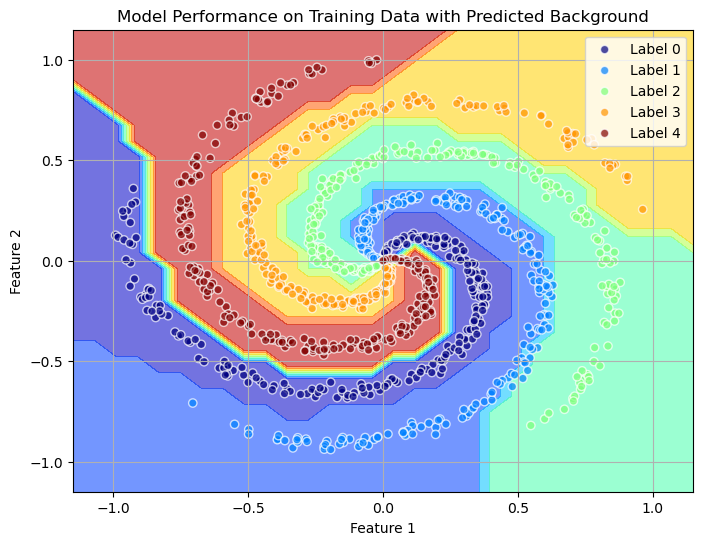

In [15]:
model.cpu()

x,y=np.meshgrid(np.linspace(-1.15,1.15,30),np.linspace(-1.15,1.15,30))
xy=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
z=model(torch.tensor(xy).float()).detach().numpy()
z=np.argmax(z,1).reshape(30,30)

# Define a normalization based on label values
norm = plt.Normalize(train_data['label'].min(), train_data['label'].max())

# Generate the visualization of the predictions
plt.figure(figsize=(8, 6))
plt.contourf(x, y, z, cmap="jet", alpha=0.55, norm=norm)

# Overlay scatter plot with the true labels
for label in sorted(train_data['label'].unique()):
    subset = train_data[train_data['label'] == label]
    plt.scatter(subset['feature1'], subset['feature2'], label=f'Label {int(label)}', norm=norm, 
                c=subset['label'], cmap="jet",alpha=0.7, edgecolors='w')

# Add legend and text
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)
plt.title("Model Performance on Training Data with Predicted Background")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

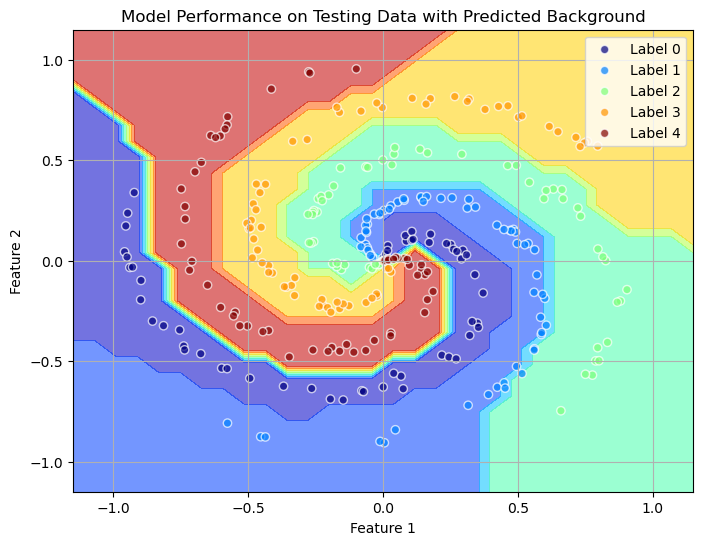

In [16]:
x,y=np.meshgrid(np.linspace(-1.15,1.15,30),np.linspace(-1.15,1.15,30))
xy=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
z=model(torch.tensor(xy).float()).detach().numpy()
z=np.argmax(z,1).reshape(30,30)

# Define a normalization based on label values
norm = plt.Normalize(test_data['label'].min(), test_data['label'].max())

# Generate the visualization of the predictions
plt.figure(figsize=(8, 6))
plt.contourf(x, y, z, cmap="jet", alpha=0.55, norm=norm)

# Overlay scatter plot with the true labels
for label in sorted(test_data['label'].unique()):
    subset = test_data[test_data['label'] == label]
    plt.scatter(subset['feature1'], subset['feature2'], label=f'Label {int(label)}', norm=norm, 
                c=subset['label'], cmap="jet",alpha=0.7, edgecolors='w')

# Add legend and text
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)
plt.title("Model Performance on Testing Data with Predicted Background")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

- The background colors represent the regions where the model predicts a certain label.
- The overlaid scatter points represent the training/testing data, colored by their true labels.  

From the visualization, we can observe that the model has done a fairly good job of classifying most data points correctly. The decision boundaries drawn by the model seem to align well with the clusters of the training and testing data. There might be minor misclassifications, especially near the center (0,0) and a little at the boundaries of the clusters, but overall the performance looks satisfactory.